In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

Wir laden Pima Indians Diabetes Datensatz (Vorhersage ob ein Patient Diabetes hat oder nicht aufgrund bestimmter diagnostischer Merkmale), CSV-Datei kann von Backstage heruntergeladen werden und untersuchen den Datensatz zunächst: erste drei Einträge mit `df.head(3)` anzeigen lassen, anschließend fragen wir mit `def.info()` ab, was für Spalten vorhanden sind und wieviele davon besetzt sind:

In [37]:
df = pd.read_csv("./data/diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Beim genauen Hinsehen, mittels `df.describe()`, fällt aber auf das einige Merkmale als Minimum den Wert `0` besitzen:

In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ein Wert `0` macht aber für die Merkmale `Glucose`, `BloodPressure`, `SkinfThickness`, `Insulin`,  `BMI` keinen Sinn, für das Merkmal `Pregnancies` hingegen schon. Wir ersetzen daher für diese Merkmale den Wert `0` durch `NAN`, um die offenbar fehlenden Werte zu markieren:

In [78]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Diese Informationen lässt sich auch mit Hilfe des Pakets `missingno` visualisieren:

In [79]:
%pip install missingno
import missingno as mno

<AxesSubplot:>

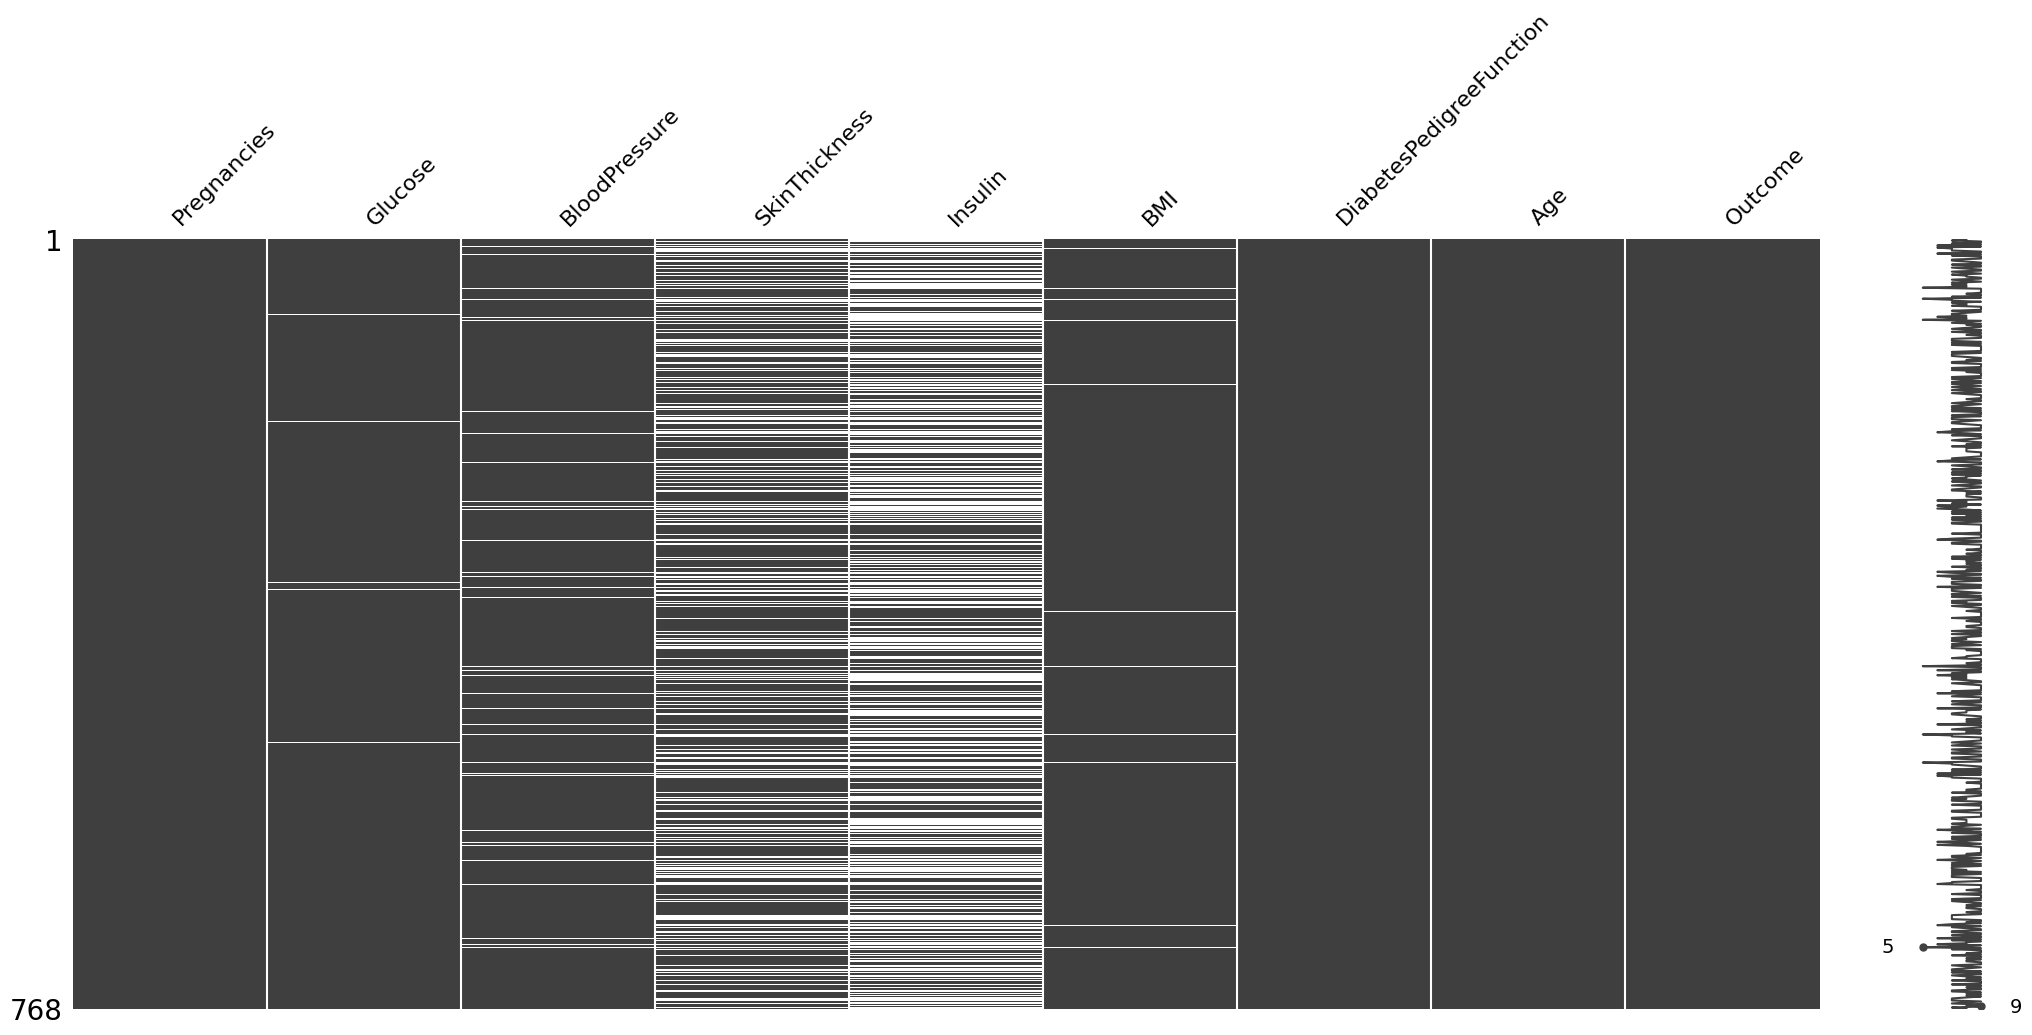

In [80]:
mno.matrix(df)

Ein einfacher Ansatz zur Behandlung dieser fehlenden Merkmale wäre, die entsprechenden Objekte aus dem Datensatz zu entfernen. Das führt aber offenbar zu einer starken Reduktion der im Datensatz vorhandenen Objekte:

In [43]:
df_cleared = df.dropna(axis=0)
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


Stattdessen können wir beispielsweise einen prototypischen Wert (Modus, Median, arithmetisches Mittel) von einem Merkmal berechnen:

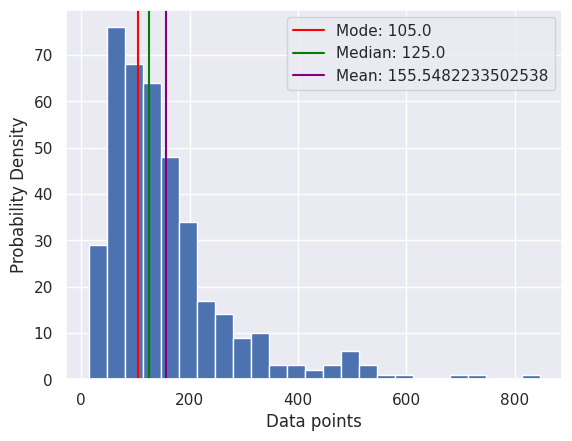

In [103]:
insulin = df['Insulin']
mode = insulin.mode()[0]
median = insulin.median()
mean = insulin.mean()
plt.hist(insulin, bins=25)
plt.axvline(mode, color='red', label=f'Mode: {mode}')
plt.axvline(median, color='green', label=f'Median: {median}')
plt.axvline(mean, color='purple', label=f'Mean: {mean}')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.legend()

... und diesen an den fehlenden Stellen einsetzen:

In [104]:
df_mean = df.fillna(value = {'Insulin': mean})
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Die statistische Verteilung der Werte, insbesondere auch deren Varianz, lässt sich mittels eines Boxplots darstellen:

<AxesSubplot:ylabel='Insulin'>

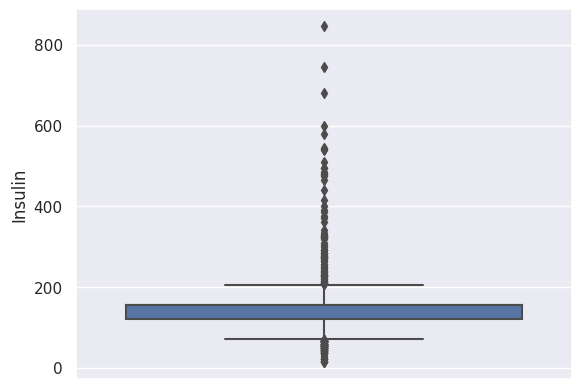

In [115]:
sns.boxplot(y = df_mean['Insulin'])

Vergleichen wir diese mit der Varianz des ursprünglichen Datensatzes (ohne `NAN`-Werte), könnne wir erkennen dass die Varianz stark abgenommen hat:

<AxesSubplot:ylabel='Insulin'>

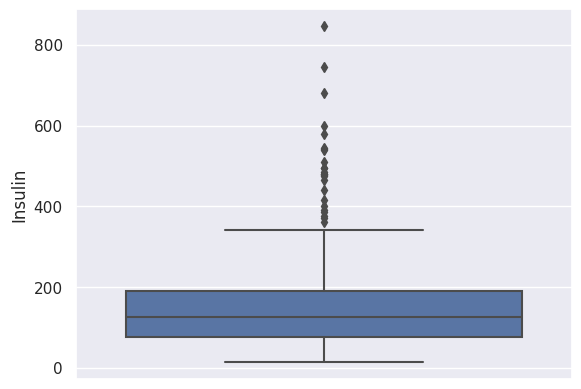

In [116]:
sns.boxplot(y = df_cleared['Insulin'])

Ein weiterer Ansatz zur Behandlung derr fehlenden Merkmale stellt die Regression dar, dazu bestimmen zunächst die Korrelationen zwischen den Merkmalen:

In [120]:
df_cleared.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


Wie zu erkennen, gibt es beispielsweise einen Zusammenhang zwischen den Merkmalen `Glucose` und `Insulin`. 
Diesen können wir ausnutzen, um ein einfaches lineares Regressionsmodell zwischen diesen zwei Merkmalen zu
generieren. Dazu entfernen wir zunächst die Objekte, für die das Merkmal `Glucose` bzw. die Merkmale
`Glucose` und `Insulin` keine Werte besitzt:

In [216]:
df_glucose_cleared = df.dropna(axis=0, subset=['Glucose'])
df_glucose_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             728 non-null    float64
 3   SkinThickness             536 non-null    float64
 4   Insulin                   393 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.6 KB


In [217]:
df_glucose_insulin_cleared = df.dropna(axis=0, subset=['Glucose', 'Insulin'])
df_glucose_insulin_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               393 non-null    int64  
 1   Glucose                   393 non-null    float64
 2   BloodPressure             393 non-null    float64
 3   SkinThickness             393 non-null    float64
 4   Insulin                   393 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  393 non-null    float64
 7   Age                       393 non-null    int64  
 8   Outcome                   393 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.7 KB


Anschließend können wir das Regressionsmodell zwischen den Merkmalen `Glucose` und `Insulin` generieren und dieses zur Vorhersage und zum Ersetzen der fehlenden Werte des Merkmals `Insulin` nutzen:

In [218]:
training_data = df_glucose_insulin_cleared.loc[:, ['Glucose', 'Insulin']]
missing_insulin = df_glucose_cleared['Insulin'].isnull()
missing = pd.DataFrame(df_glucose_cleared['Glucose'][missing_insulin])
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(training_data[['Glucose']], training_data['Insulin'])
model.predict(missing)
df_regression = df_glucose_cleared
prediction = model.predict(missing)
df_regression.loc[missing_insulin, 'Insulin'] = prediction
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             728 non-null    float64
 3   SkinThickness             536 non-null    float64
 4   Insulin                   763 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.6 KB


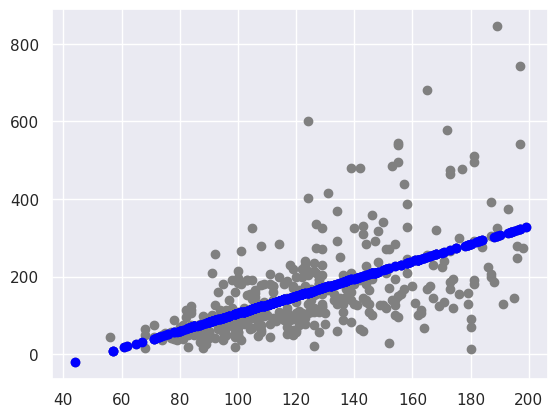

In [228]:
plt.scatter(df_glucose_cleared['Glucose'], df_glucose_cleared['Insulin'], color='gray')
plt.scatter(missing, df_glucose_cleared['Insulin'][missing_insulin], color='blue')

Vergleichen wir wieder die Varianzen, können wir erkennen dass wir nun eine höhere Varianz erhalten:

<AxesSubplot:ylabel='Insulin'>

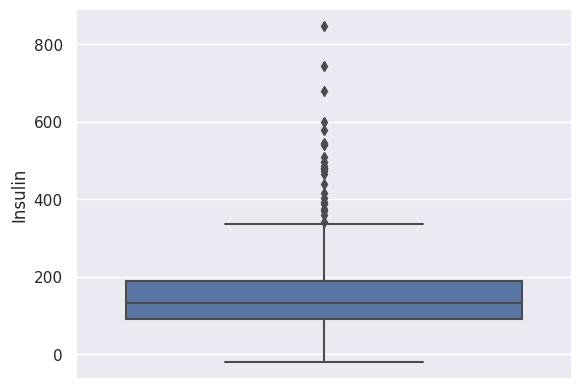

In [230]:
sns.boxplot(y = df_regression['Insulin'])